In [1]:
#Add google drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
#Add link to shared cross section library
#shared library was added as a shortcut to My Drive from the web interface
%env OPENMC_CROSS_SECTIONS = /gdrive/My Drive/data/endfb71_hdf5/cross_sections.xml

env: OPENMC_CROSS_SECTIONS=/gdrive/My Drive/data/endfb71_hdf5/cross_sections.xml


In [3]:
#Download miniconda and install
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-12-10 21:07:17--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.3’

Miniconda3-py37_4.8 100%[===================>]  81.12M   124MB/s    in 0.7s    

2020-12-10 21:07:18 (124 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.3’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ | / - \ | / - failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: - \ | / - \ | / - failed with initial frozen s

In [4]:
# Install OpenMC
!conda config --add channels conda-forge
!conda install openmc -y

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

# All requested packages already installed.



In [5]:
import openmc

In [6]:
%matplotlib inline

In [7]:
#just my materials, these work fine

# borated water
water = openmc.Material(name='Borated Water')
water.set_density('g/cm3', 0.740582)
water.add_nuclide('H1', 4.9457e-2)
water.add_nuclide('O16', 2.4732e-2)
water.add_nuclide('B10', 8.0042e-6)


# 20 enriched uranium zirconium hydride fuel
uzrh = openmc.Material(name='UZrH')
uzrh.set_density('g/cm3', 6.128)
uzrh.add_nuclide('U235', .02376, 'wo')
uzrh.add_nuclide('U238', .09619, 'wo')
uzrh.add_element('H', .03, 'wo')
uzrh.add_element('Zr', .85, 'wo')

# molybdenum
molybdenum = openmc.Material(name='Molybdenum')
molybdenum.add_element('Mo', 1.0)
molybdenum.set_density('g/cm3', 10.22)

# graphite
graphite = openmc.Material(name='Graphite')
graphite.set_density('g/cm3', 1.70)
graphite.add_element('C', 1.0)
graphite.add_s_alpha_beta('c_Graphite')

#stainless steel
ss304 = openmc.Material(name='Stainless Steel 304')
ss304.set_density('g/cm3', 8.0)
ss304.add_element('C',.002,'wo')
ss304.add_element('Si',.004,'wo')
ss304.add_element('P',.0003,'wo')
ss304.add_element('S',.0002,'wo')
ss304.add_element('V',.003,'wo')
ss304.add_element('Cr',.115,'wo')
ss304.add_element('Mn',.006,'wo')
ss304.add_element('Fe',.8495,'wo')
ss304.add_element('Ni',.005,'wo')
ss304.add_element('Mo',.01,'wo')
ss304.add_element('W',.005,'wo')

# boron carbide
b4c = openmc.Material(name='Boron Carbide')
b4c.set_density('g/cm3', 2.52)
b4c.add_element('B', 4)
b4c.add_element('C', 1)

# zirconium 
zirconium = openmc.Material(name='Zirconium')
zirconium.add_element('Zr', 1.0)
zirconium.set_density('g/cm3', 6.506)

# void
void = openmc.Material(name='Void')
void.set_density('g/cm3', 0.001205)
void.add_element('Ni', 0.755268, 'wo')
void.add_element('C', 0.000124, 'wo')
void.add_element('O', 0.231781, 'wo')
void.add_element('Ar', 0.012827, 'wo')

# aluminum
aluminum = openmc.Material(name='Aluminum')
aluminum.add_element('Al', 1.0)
aluminum.set_density('g/cm3', 2.6)

# Instantiate a Materials collection
materials_file = openmc.Materials([ aluminum, zirconium, b4c, ss304, graphite, molybdenum, uzrh, water, void])

# Export to "materials.xml"
materials_file.export_to_xml()

In [8]:
#this works fine

# Create cylinders for the fuel cell
rod_outer_radius = openmc.ZCylinder(x0=0.0, y0=0.0, r=0.635)
uzrh_outer_radius = openmc.ZCylinder(x0=0.0, y0=0.0, r=3.6449)
molybdenum_outer_radius = openmc.ZCylinder(x0=0.0, y0=0.0, r=3.6449)
graphite_outer_radius = openmc.ZCylinder(x0=0.0, y0=0.0, r=3.6449)
ss304_outer_radius = openmc.ZCylinder(x0=0.0, y0=0.0, r=3.6449)
clad_outer_radius = openmc.ZCylinder(x0=0.0, y0=0.0, r=3.75412)

# Z axis fuel cell
rod_min = openmc.ZPlane(z0 = -55.079265)
rod_max = openmc.ZPlane(z0 = -16.979265)
uzrh_min = openmc.ZPlane(z0 = -55.079265)
uzrh_max = openmc.ZPlane(z0 = -16.979265)
molybdenum_min = openmc.ZPlane(z0 = -55.15864)
molybdenum_max = openmc.ZPlane(z0 = -55.079265)
graphite_upper_min = openmc.ZPlane(z0 = -16.979265)
graphite_upper_max = openmc.ZPlane(z0 = -10.375265)
graphite_lower_min = openmc.ZPlane(z0 = -64.621664)
graphite_lower_max = openmc.ZPlane(z0 = -55.15864)
ss304_upper_min = openmc.ZPlane(z0 = -10.375265)
ss304_upper_max = openmc.ZPlane(z0 = +0)
ss304_lower_min = openmc.ZPlane(z0 = -72.0598)
ss304_lower_max = openmc.ZPlane(z0 = -64.621664)
clad_min = openmc.ZPlane(z0 = -72.0598)
clad_max = openmc.ZPlane(z0 = +0)


# Create boundary planes to surround the geometry
min_x = openmc.XPlane(x0=-5, boundary_type='vacuum')
max_x = openmc.XPlane(x0=+5, boundary_type='vacuum')
min_y = openmc.YPlane(y0=-5, boundary_type='vacuum')
max_y = openmc.YPlane(y0=+5, boundary_type='vacuum')
min_z = openmc.ZPlane(z0=+-72.0598, boundary_type='vacuum')
max_z = openmc.ZPlane(z0=+0, boundary_type='vacuum')

# Create a Universe to encapsulate a fuel pin
fuel_universe = openmc.Universe(name='UZrH Fuel Cell')

# Create rod cell
rod_cell = openmc.Cell(name='Zr Rod')
rod_cell.fill = zirconium
rod_cell.region = -rod_outer_radius & +rod_min & -rod_max
fuel_universe.add_cell(rod_cell)

# Create uzrh cell
uzrh_cell = openmc.Cell(name='UZrH')
uzrh_cell.fill = uzrh
uzrh_cell.region = +rod_outer_radius & -uzrh_outer_radius & +uzrh_min & -uzrh_max
fuel_universe.add_cell(uzrh_cell)

# Create molybdenum disk
molybdenum_cell = openmc.Cell(name='Molybdenum')
molybdenum_cell.fill = molybdenum
molybdenum_cell.region = -molybdenum_outer_radius & +molybdenum_min & -molybdenum_max
fuel_universe.add_cell(molybdenum_cell)

# Create upper graphite cell
graphite_upper_cell = openmc.Cell(name='Upper Graphite')
graphite_upper_cell.fill = graphite
graphite_upper_cell.region = -graphite_outer_radius & +graphite_upper_min & -graphite_upper_max
fuel_universe.add_cell(graphite_upper_cell)

# Create lower graphite cell
graphite_lower_cell = openmc.Cell(name='Lower Graphite')
graphite_lower_cell.fill = graphite
graphite_lower_cell.region = -graphite_outer_radius & +graphite_lower_min & -graphite_lower_max
fuel_universe.add_cell(graphite_lower_cell)

# Create upper ss304 cell
ss304_upper_cell = openmc.Cell(name='Upper Stainless Steel 304')
ss304_upper_cell.fill = ss304
ss304_upper_cell.region = -ss304_outer_radius & +ss304_upper_min & -ss304_upper_max 
fuel_universe.add_cell(ss304_upper_cell)

# Create lower ss304 cell
ss304_lower_cell = openmc.Cell(name='Lower Stainless Steel 304')
ss304_lower_cell.fill = ss304
ss304_lower_cell.region = -ss304_outer_radius & +ss304_lower_min & -ss304_lower_max
fuel_universe.add_cell(ss304_lower_cell)

# Create a clad Cell
clad_cell = openmc.Cell(name='Stainless Steel 304 Cladding')
clad_cell.fill = ss304
clad_cell.region = -clad_outer_radius & +ss304_outer_radius & +clad_min & -clad_max
fuel_universe.add_cell(clad_cell)

# Create a moderator Cell
moderator_cell = openmc.Cell(name='Moderator')
moderator_cell.fill = water
moderator_cell.region = +clad_outer_radius & +clad_min & -clad_max & +min_x & -max_x & +min_y & -max_y
fuel_universe.add_cell(moderator_cell)

geometry = openmc.Geometry(fuel_universe)

geometry.export_to_xml()


In [9]:
#this works fine


# Create cylinders for transient cell
void_outer_radius = openmc.ZCylinder(x0=0.0, y0=0.0, r=3.03276)
b4c_outer_radius = openmc.ZCylinder(x0=0.0, y0=0.0, r=3.03276)
clad_outer_radius = openmc.ZCylinder(x0=0.0, y0=0.0, r=3.38455)
aluminum_outer_radius = openmc.ZCylinder(x0=0.0, y0=0.0, r=3.03276)

#Z axis transient cell
aluminum_1_min = openmc.ZPlane(z0 = -114.3)
aluminum_1_max = openmc.ZPlane(z0 = -113.03)
void_1_min = openmc.ZPlane(z0 = -113.03)
void_1_max = openmc.ZPlane(z0 = -57.785)
aluminum_2_min = openmc.ZPlane(z0 = -57.785)
aluminum_2_max = openmc.ZPlane(z0 = -56.515)
b4c_min = openmc.ZPlane(z0 = -56.515)
b4c_max = openmc.ZPlane(z0 = -18.415)
void_2_min = openmc.ZPlane(z0 = -18.415)
void_2_max = openmc.ZPlane(z0 = -18.0975)
aluminum_3_min = openmc.ZPlane(z0 = -18.0975)
aluminum_3_max = openmc.ZPlane(z0 = -16.8275)
void_3_min = openmc.ZPlane(z0 = -16.8275)
void_3_max = openmc.ZPlane(z0 = -7.3025)
aluminum_4_min = openmc.ZPlane(z0 = -7.3025)
aluminum_4_max = openmc.ZPlane(z0 = +0)
clad_min = openmc.ZPlane(z0 = -114.3)
clad_max = openmc.ZPlane(z0 = +0)


# Create boundary planes to surround the geometry
min_x = openmc.XPlane(x0=-5, boundary_type='vacuum')
max_x = openmc.XPlane(x0=+5, boundary_type='vacuum')
min_y = openmc.YPlane(y0=-5, boundary_type='vacuum')
max_y = openmc.YPlane(y0=+5, boundary_type='vacuum')
min_z = openmc.ZPlane(z0=-114.3, boundary_type='vacuum')
max_z = openmc.ZPlane(z0=+0, boundary_type='vacuum')

# Create a Universe to encapsulate a transient pin
transient_universe = openmc.Universe(name='Transient Cell')

# Create void 1 cell
void_1_cell = openmc.Cell(name= 'Void 1')
void_1_cell.fill = void
void_1_cell.region = -void_outer_radius & +void_1_min & -void_1_max
transient_universe.add_cell(void_1_cell)

# Create void 2 cell
void_2_cell = openmc.Cell(name= 'Void 2')
void_2_cell.fill = void
void_2_cell.region = -void_outer_radius & +void_2_min & -void_2_max 
transient_universe.add_cell(void_2_cell)

# Create void 3 cell
void_3_cell = openmc.Cell(name= 'Void 3')
void_3_cell.fill = void
void_3_cell.region = -void_outer_radius & +void_3_min & -void_3_max 
transient_universe.add_cell(void_3_cell)

# Create b4c cell
b4c_cell = openmc.Cell(name='Boron Carbide')
b4c_cell.fill = b4c
b4c_cell.region = -b4c_outer_radius & -b4c_max & +b4c_min
transient_universe.add_cell(b4c_cell)

# Create aluminum 1 cell
aluminum_1_cell = openmc.Cell(name='Aluminum')
aluminum_1_cell.fill = aluminum
aluminum_1_cell.region = -aluminum_outer_radius & +aluminum_1_min & -aluminum_1_max 
transient_universe.add_cell(aluminum_1_cell)

# Create aluminum 2 cell
aluminum_2_cell = openmc.Cell(name='Aluminum')
aluminum_2_cell.fill = aluminum
aluminum_2_cell.region = -aluminum_outer_radius & +aluminum_2_min & -aluminum_2_max
transient_universe.add_cell(aluminum_2_cell)

# Create aluminum 3 cell
aluminum_3_cell = openmc.Cell(name='Aluminum')
aluminum_3_cell.fill = aluminum
aluminum_3_cell.region = -aluminum_outer_radius & +aluminum_3_min & -aluminum_3_max 
transient_universe.add_cell(aluminum_3_cell)

# Create aluminum 4 cell
aluminum_4_cell = openmc.Cell(name='Aluminum')
aluminum_4_cell.fill = aluminum
aluminum_4_cell.region = -aluminum_outer_radius & +aluminum_4_min & -aluminum_4_max
transient_universe.add_cell(aluminum_4_cell)

# Create a clad cell
clad_cell = openmc.Cell(name='Aluminum Cladding')
clad_cell.fill = aluminum
clad_cell.region = -clad_outer_radius & +b4c_outer_radius & +clad_min & -clad_max 
transient_universe.add_cell(clad_cell)

# Create a moderator Cell
moderator_cell = openmc.Cell(name='Moderator')
moderator_cell.fill = water
moderator_cell.region = +clad_outer_radius & +clad_min & -clad_max & +min_x & -max_x & +min_y & -max_y
transient_universe.add_cell(moderator_cell)

geometry = openmc.Geometry(transient_universe)

geometry.export_to_xml()


In [10]:
#this works fine


# Create cylinders for control cells
rod_outer_radius = openmc.ZCylinder(x0=0.0, y0=0.0, r=0.635)
uzrh_outer_radius = openmc.ZCylinder(x0=0.0, y0=0.0, r=3.33375)
void_outer_radius = openmc.ZCylinder(x0=0.0, y0=0.0, r=3.33375)
b4c_outer_radius = openmc.ZCylinder(x0=0.0, y0=0.0, r=3.33375)
ss304_outer_radius = openmc.ZCylinder(x0=0.0, y0=0.0, r=3.33375)
clad_outer_radius = openmc.ZCylinder(x0=0.0, y0=0.0, r=3.38455)

#Z axis control cell
ss304_5_min = openmc.ZPlane(z0 = -114.3)
ss304_5_max = openmc.ZPlane(z0 = -113.03)
void_4_min = openmc.ZPlane(z0 = -113.03)
void_4_max = openmc.ZPlane(z0 = -99.06)
ss304_4_min = openmc.ZPlane(z0 = -99.06)
ss304_4_max = openmc.ZPlane(z0 = -96.52)
rod_min = openmc.ZPlane(z0 = -96.525)
rod_max = openmc.ZPlane(z0 = -58.42)
uzrh_min = openmc.ZPlane(z0 = -96.52)
uzrh_max = openmc.ZPlane(z0 = -58.42)
void_1_min = openmc.ZPlane(z0 = -58.42)
void_1_max = openmc.ZPlane(z0 = -57.785)
ss304_1_min = openmc.ZPlane(z0 = -57.785)
ss304_1_max = openmc.ZPlane(z0 = -56.515)
b4c_1_min = openmc.ZPlane(z0 = -56.515)
b4c_1_max = openmc.ZPlane(z0 = -18.415)
void_2_min = openmc.ZPlane(z0 = -18.415)
void_2_max = openmc.ZPlane(z0 = -18.0975)
ss304_2_min = openmc.ZPlane(z0 = -18.0975)
ss304_2_max = openmc.ZPlane(z0 = -16.8275)
void_3_min = openmc.ZPlane(z0 = -16.8275)
void_3_max = openmc.ZPlane(z0 = -7.3025)
ss304_3_min = openmc.ZPlane(z0 = -7.3025)
ss304_3_max = openmc.ZPlane(z0 = +0)
clad_min = openmc.ZPlane(z0 = -114.3)
clad_max = openmc.ZPlane(z0 = +0)

# Create boundary planes to surround the geometry
min_x = openmc.XPlane(x0=-5, boundary_type='vacuum')
max_x = openmc.XPlane(x0=+5, boundary_type='vacuum')
min_y = openmc.YPlane(y0=-5, boundary_type='vacuum')
max_y = openmc.YPlane(y0=+5, boundary_type='vacuum')
min_z = openmc.ZPlane(z0=-114.3, boundary_type='vacuum')
max_z = openmc.ZPlane(z0=+0, boundary_type='vacuum')

# Create a Universe to encapsulate a control pin
control_universe = openmc.Universe(name='Control Cell')

# Create rod cell
rod_cell = openmc.Cell(name='Zr Rod')
rod_cell.fill = zirconium
rod_cell.region = -rod_outer_radius & +rod_min & -rod_max
control_universe.add_cell(rod_cell)

# Create uzrh cell
uzrh_cell = openmc.Cell(name='UZrH')
uzrh_cell.fill = uzrh
uzrh_cell.region = +rod_outer_radius & -uzrh_outer_radius & +uzrh_min & -uzrh_max
control_universe.add_cell(uzrh_cell)

# Create void 1 cell
void_1_cell = openmc.Cell(name= 'Void 1')
void_1_cell.fill = void
void_1_cell.region = -void_outer_radius & +void_1_min & -void_1_max
control_universe.add_cell(void_1_cell)

# Create void 2 cell
void_2_cell = openmc.Cell(name= 'Void 2')
void_2_cell.fill = void
void_2_cell.region = -void_outer_radius & +void_2_min & -void_2_max 
control_universe.add_cell(void_2_cell)

# Create void 3 cell
void_3_cell = openmc.Cell(name= 'Void 3')
void_3_cell.fill = void
void_3_cell.region = -void_outer_radius & +void_3_min & -void_3_max 
control_universe.add_cell(void_3_cell)

# Create void 4 cell
void_4_cell = openmc.Cell(name= 'Void 3')
void_4_cell.fill = void
void_4_cell.region = -void_outer_radius & +void_4_min & -void_4_max 
control_universe.add_cell(void_4_cell)

# Create ss304 1 cell
ss304_1_cell = openmc.Cell(name='Stainless Steel 304')
ss304_1_cell.fill = ss304
ss304_1_cell.region = -ss304_outer_radius & +ss304_1_min & -ss304_1_max 
control_universe.add_cell(ss304_1_cell)

# Create ss304 2 cell
ss304_2_cell = openmc.Cell(name='Stainless Steel 304')
ss304_2_cell.fill = ss304
ss304_2_cell.region = -ss304_outer_radius & +ss304_2_min & -ss304_2_max 
control_universe.add_cell(ss304_2_cell)

# Create ss304 3 cell
ss304_3_cell = openmc.Cell(name='Stainless Steel 304')
ss304_3_cell.fill = ss304
ss304_3_cell.region = -ss304_outer_radius & +ss304_3_min & -ss304_3_max 
control_universe.add_cell(ss304_3_cell)

# Create ss304 4 cell
ss304_4_cell = openmc.Cell(name='Stainless Steel 304')
ss304_4_cell.fill = ss304
ss304_4_cell.region = -ss304_outer_radius & +ss304_4_min & -ss304_4_max 
control_universe.add_cell(ss304_4_cell)

# Create ss304 5 cell
ss304_5_cell = openmc.Cell(name='Stainless Steel 304')
ss304_5_cell.fill = ss304
ss304_5_cell.region = -ss304_outer_radius & +ss304_5_min & -ss304_5_max 
control_universe.add_cell(ss304_5_cell)

# Create a clad Cell
clad_cell = openmc.Cell(name='Stainless Steel 304 Cladding')
clad_cell.fill = ss304
clad_cell.region = -clad_outer_radius & +clad_min & -clad_max
control_universe.add_cell(clad_cell)

# Create a moderator Cell
moderator_cell = openmc.Cell(name='Moderator')
moderator_cell.fill = water
moderator_cell.region = +clad_outer_radius & +clad_min & -clad_max
control_universe.add_cell(moderator_cell)

# Add boundary planes
control_universe.region = +min_x & -max_x & +min_y & -max_y & +min_z & -max_z

geometry = openmc.Geometry(control_universe)

geometry.export_to_xml()



In [32]:
#this is the water that is gonna surround the lattice

all_water_cell = openmc.Cell(fill=water)
outer_universe = openmc.Universe(cells=(all_water_cell,))

In [33]:
import numpy as np
# These are the surfaces that will divide each of the rings
ring_radii = np.array([0.0, 8.0, 16.0, 24.0, 32.0, 40.0])
radial_surf = [openmc.ZCylinder(r=r) for r in
               (ring_radii[:-1] + ring_radii[1:])/2]

water_cells = []
for i in range(ring_radii.size):
    # Create annular region
    if i == 0:
        water_region = -radial_surf[i]
    elif i == ring_radii.size - 1:
        water_region = +radial_surf[i-1]
    else:
        water_region = +radial_surf[i-1] & -radial_surf[i]
        
    water_cells.append(openmc.Cell(fill=water, region=water_region))

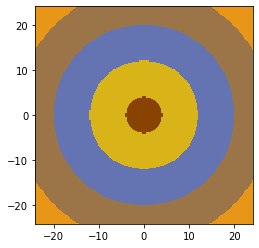

In [34]:
plot_args = {'width': (2*24.1, 2*24.1)}
# plot_args = {'width': (2*3.6, 2*3.6)}
bundle_universe = openmc.Universe(cells=water_cells)
bundle_universe.plot(**plot_args)

In [35]:
num_pins = [1, 6, 12, 18, 24, 30]
angles = [0, 0, 0, 0, 0, 0]


controlRods = {'numPins'  :[num_pins[1], num_pins[3]],
               'howLeftFrom3oclock':[4          , 2]}

transientRods = {'numPins'  :[num_pins[3], num_pins[2]],
               'howLeftFrom3oclock':[1          , 0]}

waterRods = {'numPins'  :[num_pins[5], num_pins[2]],
               'howLeftFrom3oclock':[1          , 8]}

def ControlRod(controlRods,n,j):
    for irod in range(len(controlRods)):
        if n   == controlRods['numPins'][irod] and \
           j-1 == controlRods['howLeftFrom3oclock'][irod]:
                return True
    return False

def TransientRod(transientRods,n,j):
    for irod in range(len(controlRods)):
        if n   == transientRods['numPins'][irod] and \
           j-1 == transientRods['howLeftFrom3oclock'][irod]:
                return True
    return False

def WaterRod(waterRods,n,j):
    for irod in range(len(controlRods)):
        if n   == waterRods['numPins'][irod] and \
           j-1 == waterRods['howLeftFrom3oclock'][irod]:
                return True
    return False


for i, (r, n, a) in enumerate(zip(ring_radii, num_pins, angles)):
    print('n',n)
    for j in range(n):
        # Determine location of center of pin
        theta = (a + j/n*360.) * np.pi/180.

        #theta = (j/n*360.) * np.pi/180.
        x = r*np.cos(theta)
        y = r*np.sin(theta)
        print('           ',j,theta,x,y)
        
        pin_boundary = openmc.ZCylinder(x0=x, y0=y, r=clad_outer_radius.r)
        water_cells[i].region &= +pin_boundary
        
        # Create each fuel pin -- note that we explicitly assign an ID so 
        # that we can identify the pin later when looking at tallies
        i#f n == controlRod['numPins'] and controlRod['numFrom12'] == j-1:
        if ControlRod(controlRods,n,j):
            print('Adding in a control rod...')
            pin = openmc.Cell(fill=control_universe, region=-pin_boundary)
        elif TransientRod(transientRods,n,j):
            print('Adding in a transient rod...')
            pin = openmc.Cell(fill=transient_universe, region=-pin_boundary)
        elif WaterRod(waterRods,n,j):
            print('Adding in a water rod...')
            pin = openmc.Cell(fill=outer_universe, region=-pin_boundary)
        else:
            pin = openmc.Cell(fill=fuel_universe, region=-pin_boundary)
        pin.translation = (x, y, 0)
        pin.id = (i + 1)*100 + j
        bundle_universe.add_cell(pin)
        

n 1
            0 0.0 0.0 0.0
n 6
            0 0.0 8.0 0.0
            1 1.0471975511965976 4.000000000000001 6.928203230275509
            2 2.0943951023931953 -3.9999999999999982 6.92820323027551
            3 3.141592653589793 -8.0 9.797174393178826e-16
            4 4.1887902047863905 -4.0000000000000036 -6.928203230275507
            5 5.235987755982989 4.000000000000001 -6.928203230275509
Adding in a control rod...
n 12
            0 0.0 16.0 0.0
            1 0.5235987755982988 13.85640646055102 7.999999999999999
Adding in a transient rod...
            2 1.0471975511965976 8.000000000000002 13.856406460551018
            3 1.5707963267948966 9.797174393178826e-16 16.0
            4 2.0943951023931953 -7.9999999999999964 13.85640646055102
            5 2.6179938779914944 -13.85640646055102 7.999999999999999
            6 3.141592653589793 -16.0 1.959434878635765e-15
            7 3.6651914291880923 -13.856406460551018 -8.000000000000002
            8 4.1887902047863905 -8.00000

/usr/local/lib/python3.7/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=100.
  warn(msg, IDWarning)
/usr/local/lib/python3.7/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=200.
  warn(msg, IDWarning)
/usr/local/lib/python3.7/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=201.
  warn(msg, IDWarning)
/usr/local/lib/python3.7/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=202.
  warn(msg, IDWarning)
/usr/local/lib/python3.7/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=203.
  warn(msg, IDWarning)
/usr/local/lib/python3.7/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=204.
  warn(msg, IDWarning)
/usr/local/lib/python3.7/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=205.
  warn(msg, IDWarning)

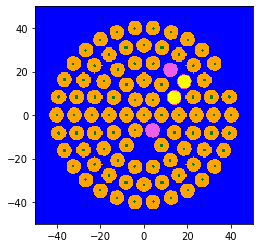

In [36]:
bundle_universe.plot(width=(100, 100), origin=[0,0,-40], 
                   basis='xy', color_by='material',
                   colors={water:'blue',uzrh:'orange',
                   zirconium:'green',graphite:'gray',
                   b4c:'yellow'})


In [ ]:
#just plots of my fuel, control, and transient cells

#fuel_universe.plot(width=(20, 150), origin=[0,0,-40], basis='yz', color_by='material', colors={ss304:'fuchsia'})
#transient_universe.plot(width=(20, 230), origin=[0,0,-18], basis='yz', color_by='material', colors={water:'fuchsia'})
control_universe.plot(width=(20, 250), basis='yz', color_by='material', colors={ss304:'fuchsia'})


In [ ]:
#openmc stuff that im not ready to do
 
#@title Default title text
# OpenMC simulation parameters
batches = 100
inactive = 10
particles = 5000

# Instantiate a Settings object
settings_file = openmc.Settings()
settings_file.batches = batches
settings_file.inactive = inactive
settings_file.particles = particles

# Create an initial uniform spatial source distribution over fissionable zones
bounds = [-28.527375, -28.527375, -28.527375, 28.527375, 28.527375, 28.527375]
uniform_dist = openmc.stats.Box(bounds[:3], bounds[3:], only_fissionable=True)
settings_file.source = openmc.Source(space=uniform_dist)

# Export to "settings.xml"
settings_file.export_to_xml()

In [ ]:
openmc.run()